##### Add this at the end of Chem\Draw\SimilarityMaps.GetSimilarityMapForFingerprint in the rdkit installation


```python	
  # ---------------------------------- add the weights to the plot ----------------------------------
  for i, atom in enumerate(mol.GetAtoms()):
    pos = mol._atomPs[i]
    weight = round(weights[i], 2)  # Get z value at this point
    fig.axes[0].text(pos[0], pos[1], f"{i}: {weight}", fontsize=8, color='black',
                      ha='center', va='center', alpha=0.7, bbox=dict(facecolor='white', alpha=0.7,
                                                                  edgecolor='none', pad=0.5))
  # -------------------------------------------------------------------------------------------------
  
  fig.axes[0].set_axis_off()

  return fig
```

##### Similarity Map with Atomic Weights

0 OC(COC(=O)c1ccccc1)C(O)C(O)COC(=O)c2ccccc2
1 Cc1cc(=O)oc2cc(OC(=O)c3ccccc3)ccc12
2 O=C(Nc1ccccc1OC(=O)c2ccccc2)c3ccccc3
3 COc1cc(CC=C)ccc1OC(=O)c2ccccc2
4 O=C(OCC1OC(C(OC(=O)c2ccccc2)C1OC(=O)c3ccccc3)n4ncc(=O)[nH]c4=O)c5ccccc5
5 O=C(Oc1cccc2ccccc12)c3ccccc3
6 O=C(N1[C@@H](C#N)C2OC2c3ccccc13)c4ccccc4
7 COC(=O)CNC(=O)c1ccccc1
8 COc1c2OCOc2cc(CCN(C)C(=O)c3ccccc3)c1C=C4C(=O)NC(=O)NC4=O
9 COc1c2OCOc2cc(CCN(C)C(=O)c3ccccc3)c1/C=C\4/C(=O)NC(=O)N(C)C4=O


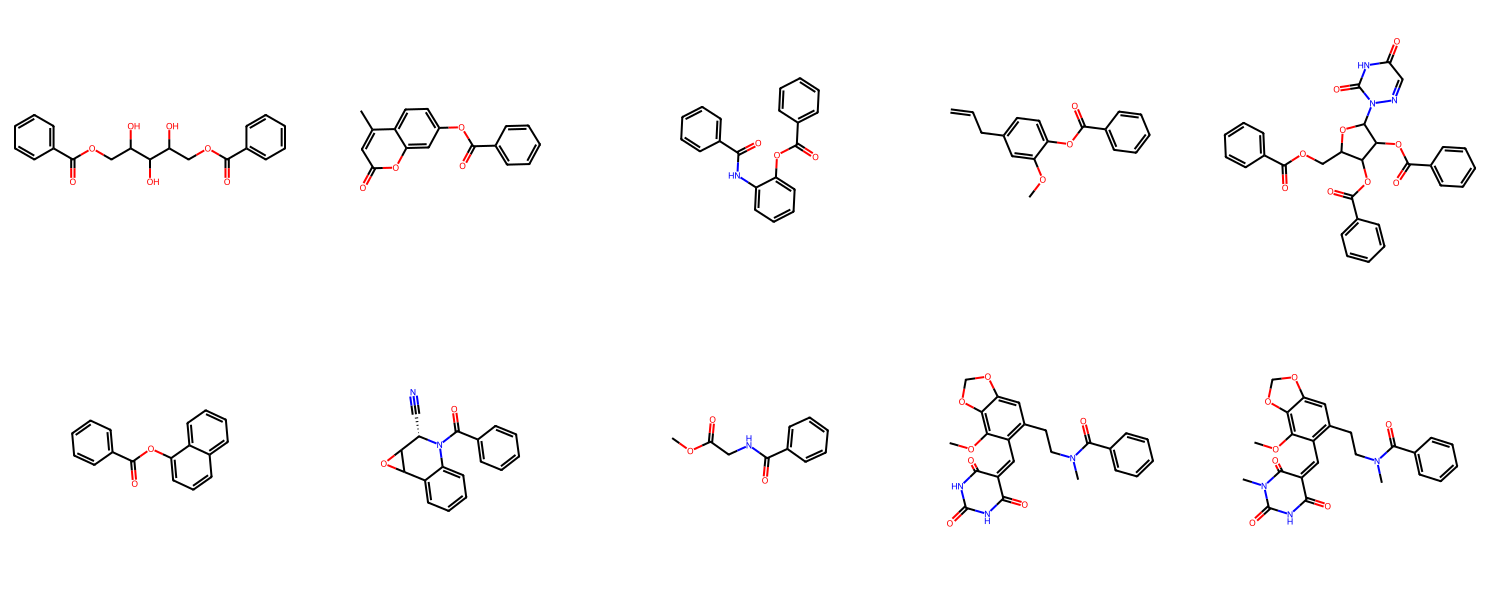

In [4]:
import os
import pickle
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps

file_import_pickle = os.path.join("tutorial-smiles.pickle")
tutorial_smiles = pickle.load(open(file_import_pickle, "rb"))

mols = []
for i, smiles in enumerate(tutorial_smiles):
    print(i, smiles)
    mols.append(Chem.MolFromSmiles(smiles))

Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(300,300))

#### Similarity Plots

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps

mol1 = Chem.MolFromSmiles('COC(=O)CNC(=O)c1ccccc1')
mol2 = Chem.MolFromSmiles('O=C(Oc1cccc2ccccc12)c3ccccc3')

draw2d = Draw.MolDraw2DSVG(400, 400)
SimilarityMaps.GetSimilarityMapForFingerprint(mol1, mol2, SimilarityMaps.GetMorganFingerprint, draw2d=draw2d)

[14:15:11] DEPRECATION WARNING: please use MorganGenerator
[14:15:11] DEPRECATION WARNING: please use MorganGenerator


(<rdkit.Chem.Draw.rdMolDraw2D.MolDraw2DSVG at 0x272c386a390>,
 0.22555746140651803)

[14:15:11] DEPRECATION WARNING: please use MorganGenerator
[14:15:11] DEPRECATION WARNING: please use MorganGenerator
[14:15:11] DEPRECATION WARNING: please use MorganGenerator
[14:15:11] DEPRECATION WARNING: please use MorganGenerator
[14:15:12] DEPRECATION WARNING: please use MorganGenerator
[14:15:12] DEPRECATION WARNING: please use MorganGenerator
[14:15:12] DEPRECATION WARNING: please use MorganGenerator
[14:15:12] DEPRECATION WARNING: please use MorganGenerator
[14:15:12] DEPRECATION WARNING: please use MorganGenerator
[14:15:12] DEPRECATION WARNING: please use MorganGenerator
[14:15:12] DEPRECATION WARNING: please use MorganGenerator
[14:15:12] DEPRECATION WARNING: please use MorganGenerator
[14:15:12] DEPRECATION WARNING: please use MorganGenerator
[14:15:12] DEPRECATION WARNING: please use MorganGenerator
[14:15:12] DEPRECATION WARNING: please use MorganGenerator
[14:15:12] DEPRECATION WARNING: please use MorganGenerator
[14:15:13] DEPRECATION WARNING: please use MorganGenerat

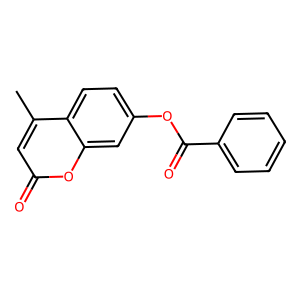

In [6]:
import importlib
importlib.reload(SimilarityMaps)
from rdkit.Chem import rdFingerprintGenerator

mfpgen = rdFingerprintGenerator.GetRDKitFPGenerator()#radius=2,fpSize=2048)

mol_id_to_compare = 1

figures = {}
for i, mol in enumerate(mols):
    if i == mol_id_to_compare:
        continue
    fig, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(mols[mol_id_to_compare], mol, SimilarityMaps.GetMorganFingerprint, size=(150,150), draw2d=draw2d)
    figures[i] = fig

Draw.MolToImage(mols[mol_id_to_compare], title=tutorial_smiles[mol_id_to_compare])

#### Next:

- ~~Plot mol[0] similaritys against the 9 other molecules~~
- ~~Check for similiar substructres visually~~
- ~~Look for pattern to differentiate substructures from rest of the molecule~~
- ~~Develop algorithm to export substructures to Mol/Smiles~~
- Draw shared substructures 

##### Similarity Plots with DrawOptions (xkcd style)

SVG

In [7]:
from IPython.display import HTML, display

mol_ref_id = 0
mol_probe_id = 6
sim_weight_threshold = 0.19

draw2d = Draw.MolDraw2DSVG(400, 400)

# DrawOptions
opts = draw2d.drawOptions()
opts.comicMode = True
opts.fontFile = "comic.ttf"

draw2d, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(mols[mol_ref_id], mols[mol_probe_id], SimilarityMaps.GetAPFingerprint, title=tutorial_smiles[i], size=(180,180), drawOptions=opts, draw2d=draw2d)
png = draw2d.GetDrawingText()

# to file
# with open('output.svg', 'w') as f:
#     f.write(img)

display(HTML(png))

[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION WARNING: please use AtomPairGenerator
[14:15:13] DEPRECATION W

PNG


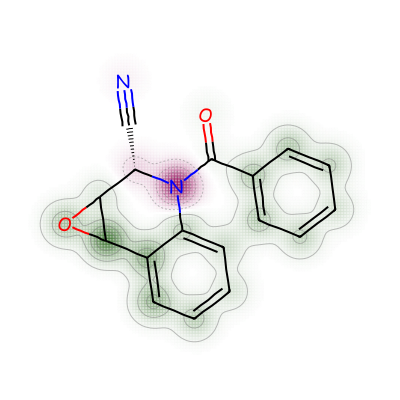

In [8]:
import base64

draw2d = Draw.MolDraw2DCairo(400, 400)

# DrawOptions
opts = draw2d.drawOptions()
opts.comicMode = True
opts.fontFile = "comic.ttf"

draw2d, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(mols[mol_ref_id], mols[mol_probe_id], SimilarityMaps.GetRDKFingerprint, title=tutorial_smiles[i], size=(180,180), drawOptions=opts, draw2d=draw2d)
png = draw2d.GetDrawingText()

# to file
open('output.png', 'wb').write(png)

# to jupyter
b64_string = base64.b64encode(png).decode('utf-8')
html = f'<img src="data:image/png;base64,{b64_string}"/>'
display(HTML(html))

##### Rendering

In [9]:
from dataclasses import dataclass
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

def bytes_to_image(byte_data: str) -> Image.Image:
    bio = BytesIO(byte_data)
    return Image.open(bio)

def show_mol(draw2d: Draw.MolDraw2D, mol: Chem.Mol,legend: str='',highlightAtoms: list=[]) -> Image.Image:
    draw2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    draw2d.FinishDrawing()
    return bytes_to_image(draw2d.GetDrawingText())

@dataclass
class SimMapLegend:
    text: str
    position: tuple[int, int] = (0, 0)
    size: int = 11
    font: str = None
    color: tuple[int, int, int] = (0, 0, 0)
    stroke_width: int = 0
    stroke_color: tuple[int, int, int] = (0, 0, 0)
    
    def draw(self, image: Image.Image) -> Image.Image:
        draw = ImageDraw.Draw(image)
        if(self.font is None):
            font = ImageFont.load_default(self.size)
        else:
            font = ImageFont.truetype(self.font, self.size)
            
        draw.text(
            xy=self.position,
            text=self.text,
            font=font,
            fill=self.color,
            stroke_width=self.stroke_width,
            stroke_fill=self.stroke_color,
        )
        return image

def show_sim_map(draw2d: Draw.MolDraw2D, ref_mol: Chem.Mol, probe_mol: Chem.Mol, fp_function=SimilarityMaps.GetRDKFingerprint, size: tuple[int, int] = (50,50), legend: SimMapLegend = None) -> Image.Image:
    draw2d, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(ref_mol, probe_mol, fp_function, draw2d=draw2d, size=size)
    draw2d.FinishDrawing()
    img = bytes_to_image(draw2d.GetDrawingText())
    
    if(legend):
        return legend.draw(img)
    
    return img

def stack_images(image1: Image.Image, image2: Image.Image, vertical: bool = True, buffer: int = 5) -> Image.Image:
    img1_xoffset = 0
    img1_yoffset = 0
    img2_xoffset = 0
    img2_yoffset = 0
    
    # Calculate dimensions + offsets
    if(vertical):
        if(image1.width > image2.width):
            total_width = image1.width
            img2_xoffset = (image1.width - image2.width) // 2
        else:
            total_width = image2.width
            img1_xoffset = (image2.width - image1.width) // 2
        
        total_height = image1.height + buffer + image2.height
    else:
        if(image1.height > image2.height):
            total_height = image1.height
            img2_yoffset = (image1.height - image2.height) // 2
        else:
            total_height = image2.height
            img1_yoffset = (image2.height - image1.height) // 2
        total_width = image1.width + buffer + image2.width

    # Create new image
    combined = Image.new('RGBA', (total_width, total_height))

    # Paste images
    combined.paste(image1, (img1_xoffset, img1_yoffset))
    if(vertical):
        combined.paste(image2, (img2_xoffset, image1.height + buffer))
    else:
        combined.paste(image2, (image1.width + buffer, img2_yoffset))
    
    return combined

# def show_images(imgs,buffer=5):
#     height = 0
#     width = 0
#     for img in imgs:
#         height = max(height,img.height)
#         width += img.width
#     width += buffer*(len(imgs)-1)
#     res = Image.new("RGBA",(width,height))
#     x = 0
#     for img in imgs:
#         res.paste(img,(x,0))
#         x += img.width + buffer
#     return res

def show_images(imgs: list[Image.Image], buffer: int = 5, max_ratio: float = 9.1) -> Image.Image:
    result = imgs[0]
    for i, img in enumerate(imgs[1:], start=1):
        width = result.width + buffer + img.width
        height = max(result.height, img.height)
        if((width / height) <= max_ratio):
            #print(f"Add Horizontal at {i}. Ratio: {width/height}")
            result = stack_images(result, img, vertical=False)
        else:
            #print(f"Add Vertical at {i}. Ratio: {width/height}")
            result = stack_images(result, show_images(imgs[i:], buffer=buffer, max_ratio=max_ratio), vertical=True)
            break
    return result

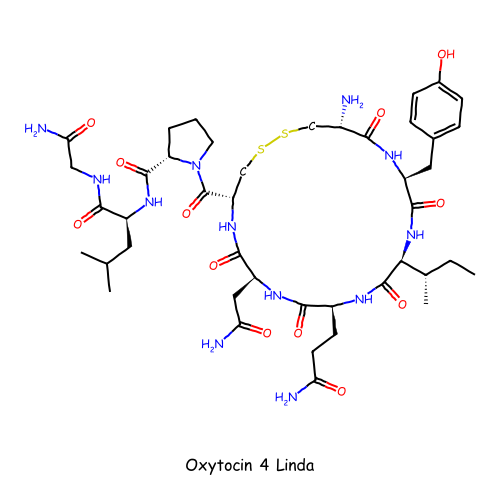

In [10]:
from io import BytesIO
from PIL import Image

mol = Chem.MolFromSmiles("CC[C@H](C)[C@H]1C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@H](C(=O)N1)CC2=CC=C(C=C2)O)N)C(=O)N3CCC[C@H]3C(=O)N[C@@H](CC(C)C)C(=O)NCC(=O)N)CC(=O)N)CCC(=O)N")#"CCN(CC)C(=O)[C@H]1CN([C@@H]2CC3=CNC4=CC=CC(=C34)C2=C1)C")
#mol = Chem.MolFromSmiles("CCN(CC)C(=O)[C@H]1CN([C@@H]2CC3=CNC4=CC=CC(=C34)C2=C1)C")

draw2d = Draw.MolDraw2DCairo(500, 500)

# DrawOptions
opts = draw2d.drawOptions()
opts.comicMode = True
opts.fontFile = "comic.ttf"

show_mol(draw2d,mol,legend='Oxytocin 4 Linda')#, highlightAtoms=[0,20])

<class 'PIL.PngImagePlugin.PngImageFile'>


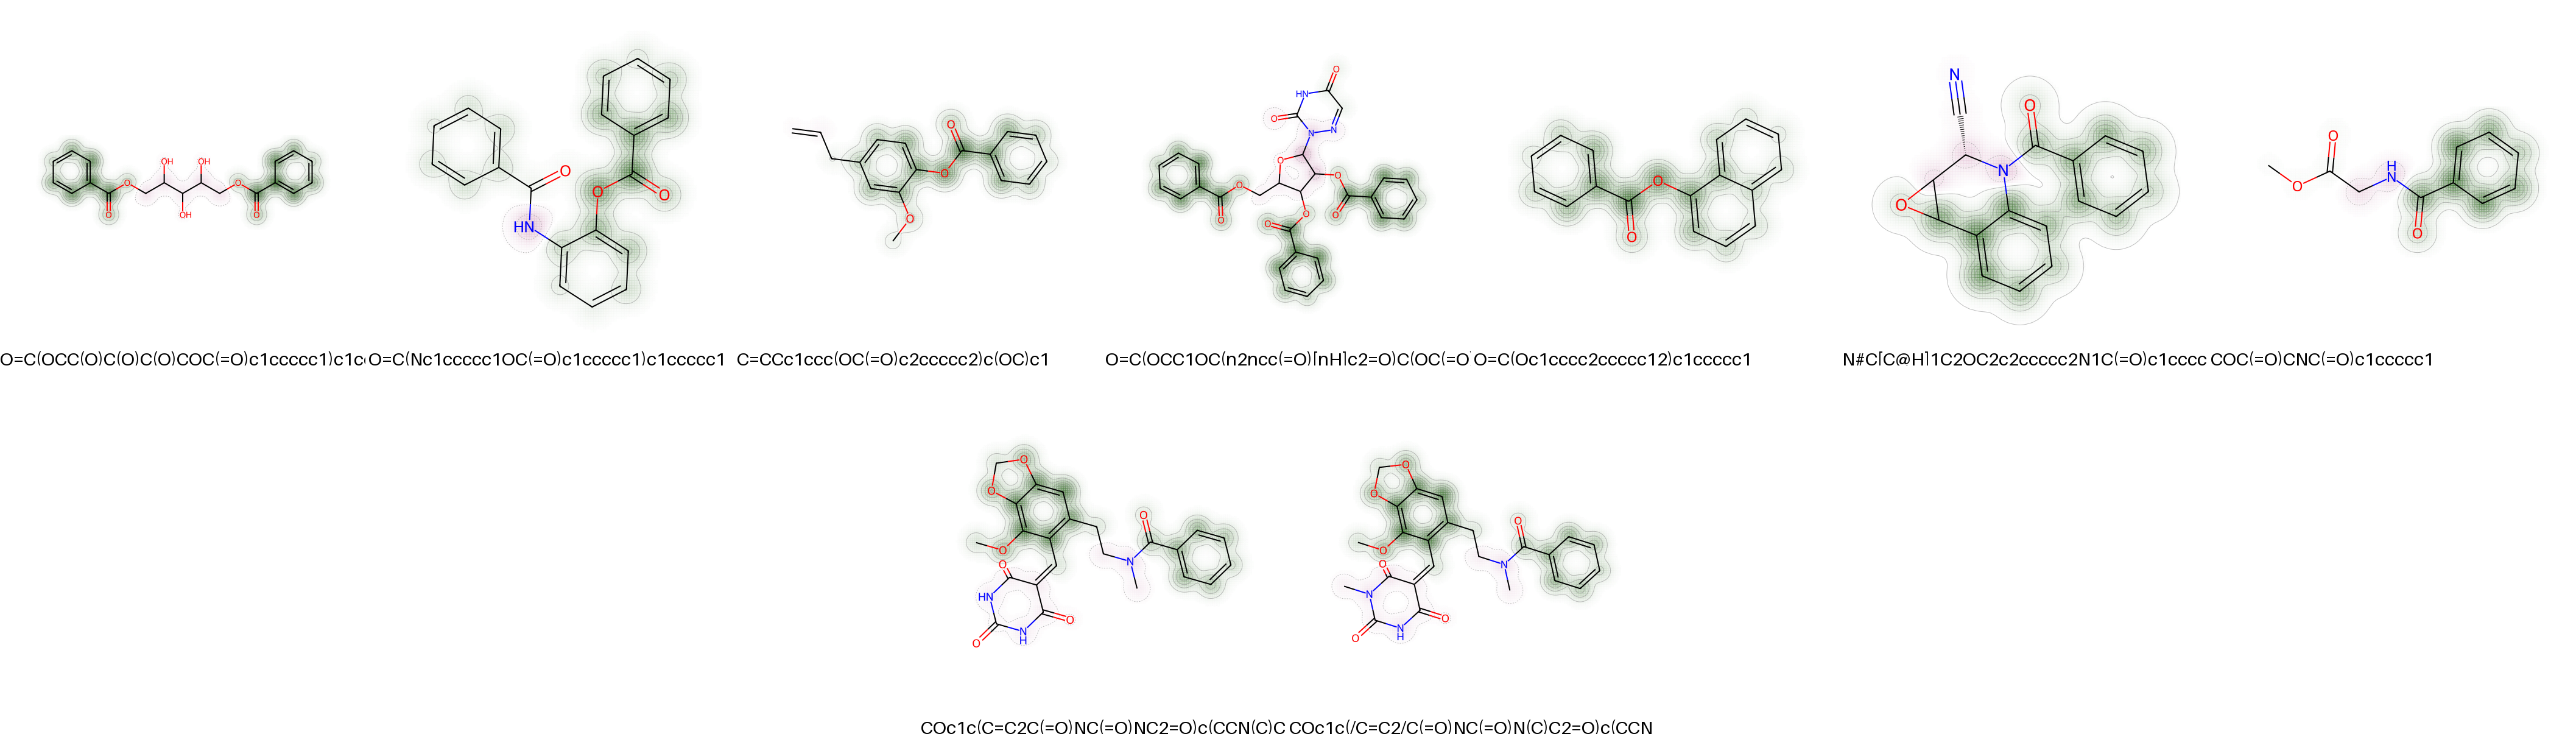

In [11]:
imgs = []
draw2d = Draw.MolDraw2DCairo(600, 600)

mol_id_to_compare = 1

for i, mol in enumerate(mols):
    if i == mol_id_to_compare:
        continue

    legend = SimMapLegend(text=Chem.MolToSmiles(mol), size=30, position=(0,600-30))
    #legend = SimMapLegend(text=str(i), size=30, position=(0, 600-30))
    sim_map = show_sim_map(draw2d, mols[mol_id_to_compare], mol, legend=legend)
    imgs.append(sim_map)

print(type(imgs[0]))
show_images(imgs, max_ratio=(8))

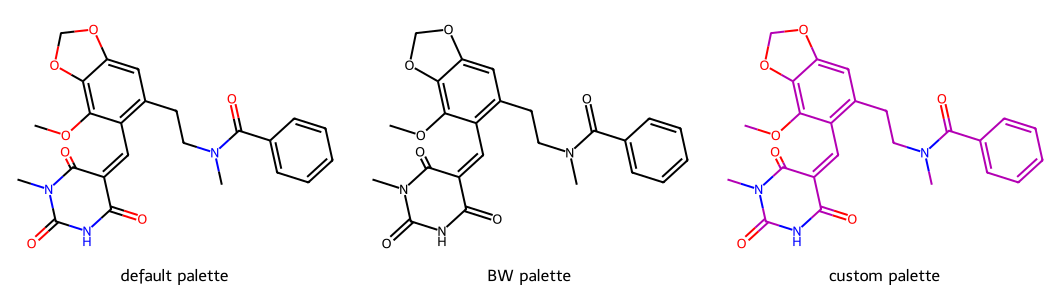

In [12]:
imgs = []
draw2d = Draw.MolDraw2DCairo(350,300)
imgs.append(show_mol(draw2d,mol,legend='default palette'))

draw2d = Draw.MolDraw2DCairo(350,300)
dopts = draw2d.drawOptions()
dopts.useBWAtomPalette()
imgs.append(show_mol(draw2d,mol,legend='BW palette'))

draw2d = Draw.MolDraw2DCairo(350,300)
dopts = draw2d.drawOptions()
# use a custom palette where C is purple
dopts.updateAtomPalette({6:(.7,0,.7)})
imgs.append(show_mol(draw2d,mol,legend='custom palette'))

show_images(imgs)

#### Export similiar mol fragments

In [13]:
from typing import List, Set
import rdkit.Chem
from collections import defaultdict

def find_weighted_fragments(mol: rdkit.Chem.rdchem.Mol, 
                          weights: List[float], 
                          threshold: float) -> List[rdkit.Chem.rdchem.Mol]:
    """
    Find connected components in an RDKit molecule where atom weights are above threshold
    and return them as separate RDKit molecules
    
    Args:
        mol: RDKit molecule object
        weights: List of weight values corresponding to atom indices
        threshold: Minimum weight value for atoms to be included
    
    Returns:
        List of RDKit Mol objects, each representing a connected component
    """
    def dfs(atom_idx: int, visited: Set[int]) -> Set[int]:
        """
        Depth-first search through molecule starting from given atom
        Returns set of connected atoms above threshold
        """
        if atom_idx in visited or weights[atom_idx] < threshold:
            return set()
            
        component = {atom_idx}
        visited.add(atom_idx)
        
        # Get current atom object
        atom = mol.GetAtomWithIdx(atom_idx)
        
        # Iterate through bonds to neighboring atoms
        for bond in atom.GetBonds():
            # Get the neighboring atom's index
            neighbor_idx = bond.GetBeginAtomIdx() if bond.GetEndAtomIdx() == atom_idx \
                         else bond.GetEndAtomIdx()
            
            if weights[neighbor_idx] >= threshold:
                component.update(dfs(neighbor_idx, visited))
                
        return component

    visited = set()
    fragment_mols = []
    
    # Iterate through all atoms to find components
    for atom in mol.GetAtoms():
        atom_idx = atom.GetIdx()
        if atom_idx not in visited and weights[atom_idx] >= threshold:
            component = dfs(atom_idx, visited)
            if component:
                # Create a new molecule for this component
                fragment = rdkit.Chem.RWMol(mol)
                
                # Create a map of atoms to remove (those not in component)
                atoms_to_remove = set(range(mol.GetNumAtoms())) - component
                
                # Remove atoms not in component (remove in reverse order to preserve indices)
                for remove_idx in sorted(atoms_to_remove, reverse=True):
                    fragment.RemoveAtom(remove_idx)
                    
                # Convert to regular molecule and add to list
                fragment_mols.append(fragment.GetMol())
                
    return fragment_mols

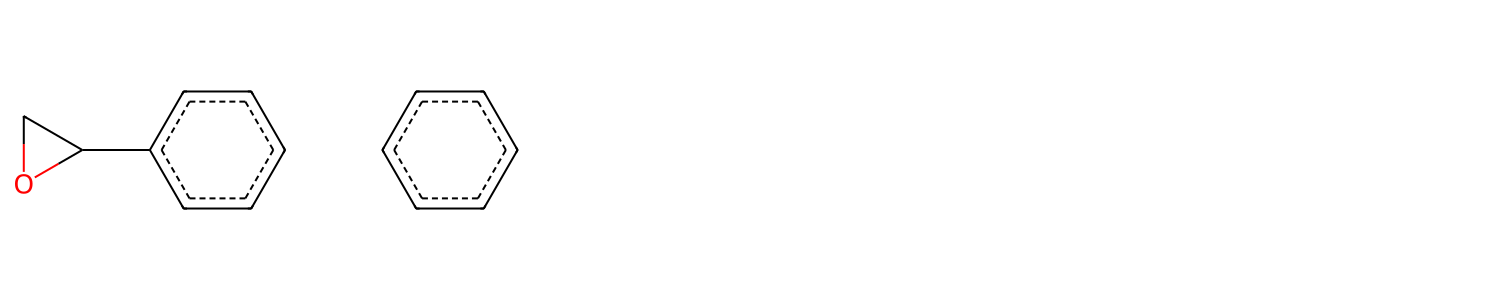

In [14]:
weights = SimilarityMaps.GetAtomicWeightsForFingerprint(mols[mol_ref_id], mols[mol_probe_id], SimilarityMaps.GetRDKFingerprint)
weights, maxWeight = SimilarityMaps.GetStandardizedWeights(weights)
fragment_mols = find_weighted_fragments(mols[mol_probe_id], weights, sim_weight_threshold)

Draw.MolsToGridImage(fragment_mols, molsPerRow=5, subImgSize=(300,300))

#### list all similiar fragments

76


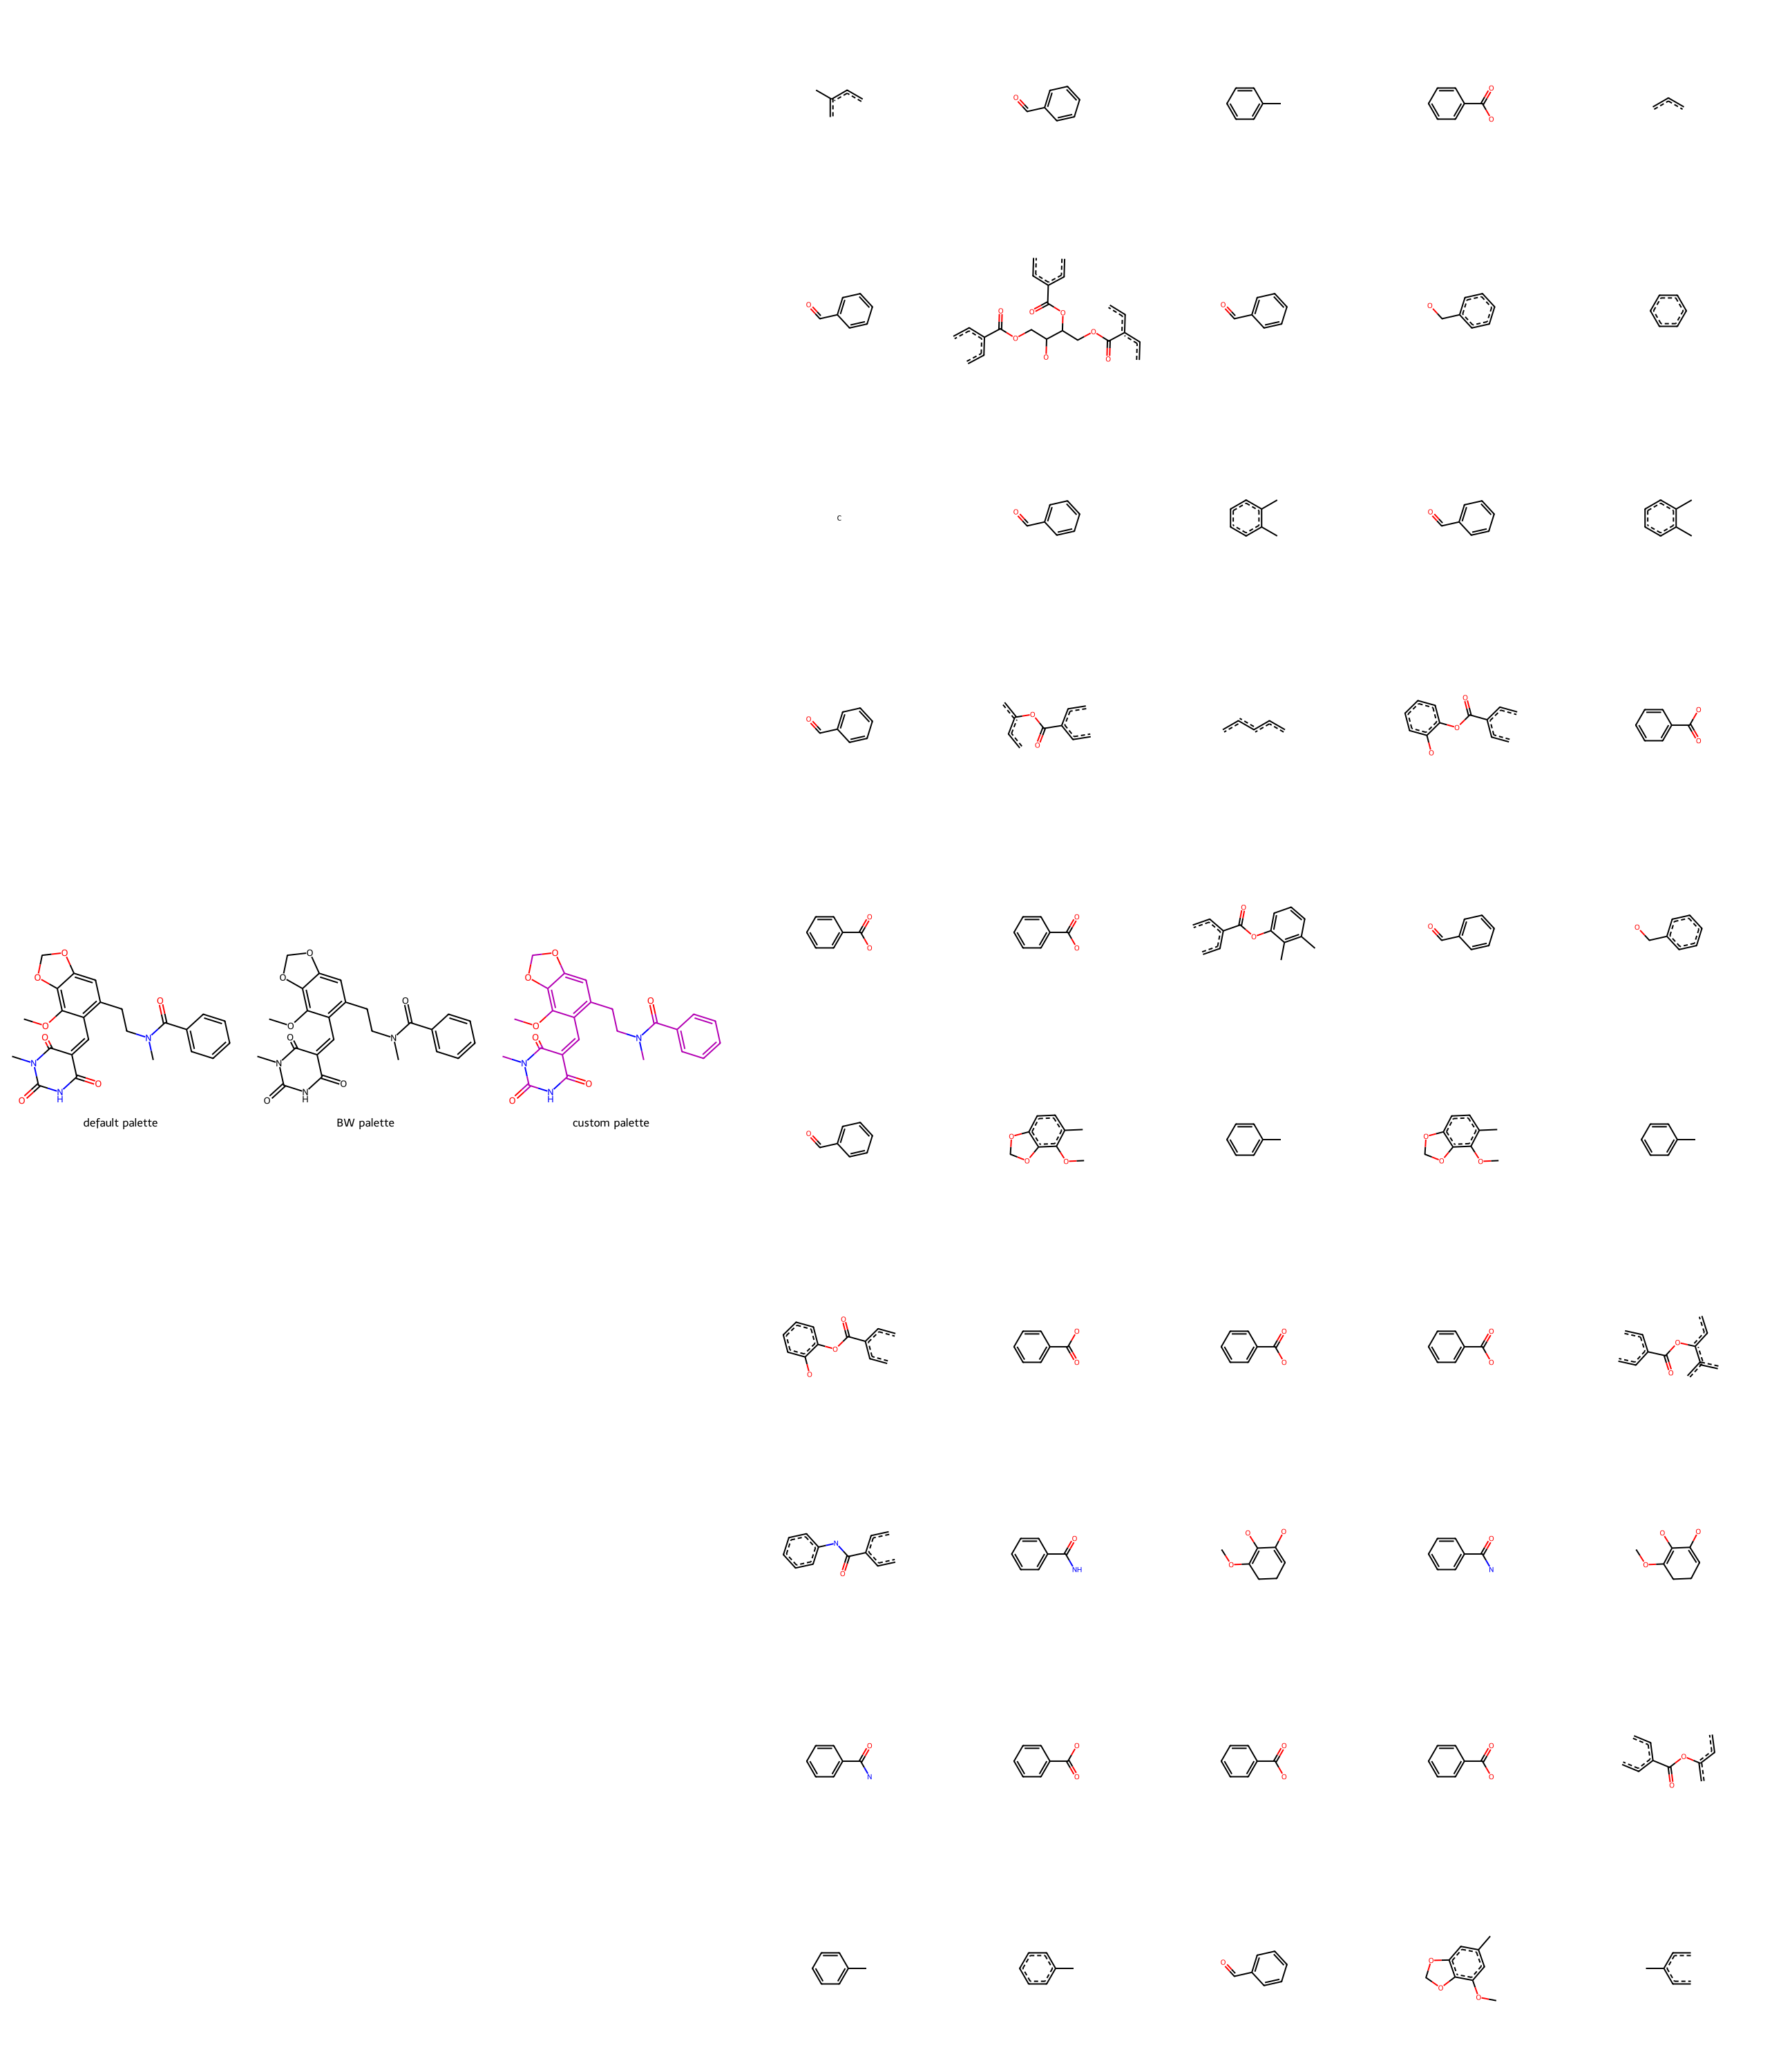

In [15]:
sim_weight_threshold = 0.2

all_fragment_mols = []
visited_pairs = set()

for ref_mol_id, ref_mol in enumerate(mols):
    for probe_mol_id, probe_mol in enumerate(mols):
        # Skip if comparing molecule to itself or if pair has already been visited
        if probe_mol_id == ref_mol_id or (probe_mol_id, ref_mol_id) in visited_pairs:
            continue
        # Add pair to visited set
        visited_pairs.add((ref_mol_id, probe_mol_id))
        
        #drawer, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(ref_mol, probe_mol, fingerprint_type, size=(180, 180))
        
        weights = SimilarityMaps.GetAtomicWeightsForFingerprint(ref_mol, probe_mol, SimilarityMaps.GetRDKFingerprint)
        weights, maxWeight = SimilarityMaps.GetStandardizedWeights(weights)
        components = find_weighted_fragments(probe_mol, weights, sim_weight_threshold)
        for component in components:
            all_fragment_mols.append(component)

print(len(all_fragment_mols))
# MolsToGridImage only accepts up to 50 molecules
gridimg = Draw.MolsToGridImage(all_fragment_mols[:50], molsPerRow=5, subImgSize=(300,300))

# Convert to PIL
buffer = BytesIO(gridimg.data)
pil_img = Image.open(buffer)

# stack_images(show_images2(imgs), pil_img)
imgs2 = imgs.copy()
imgs2.append(pil_img)
show_images(imgs2)

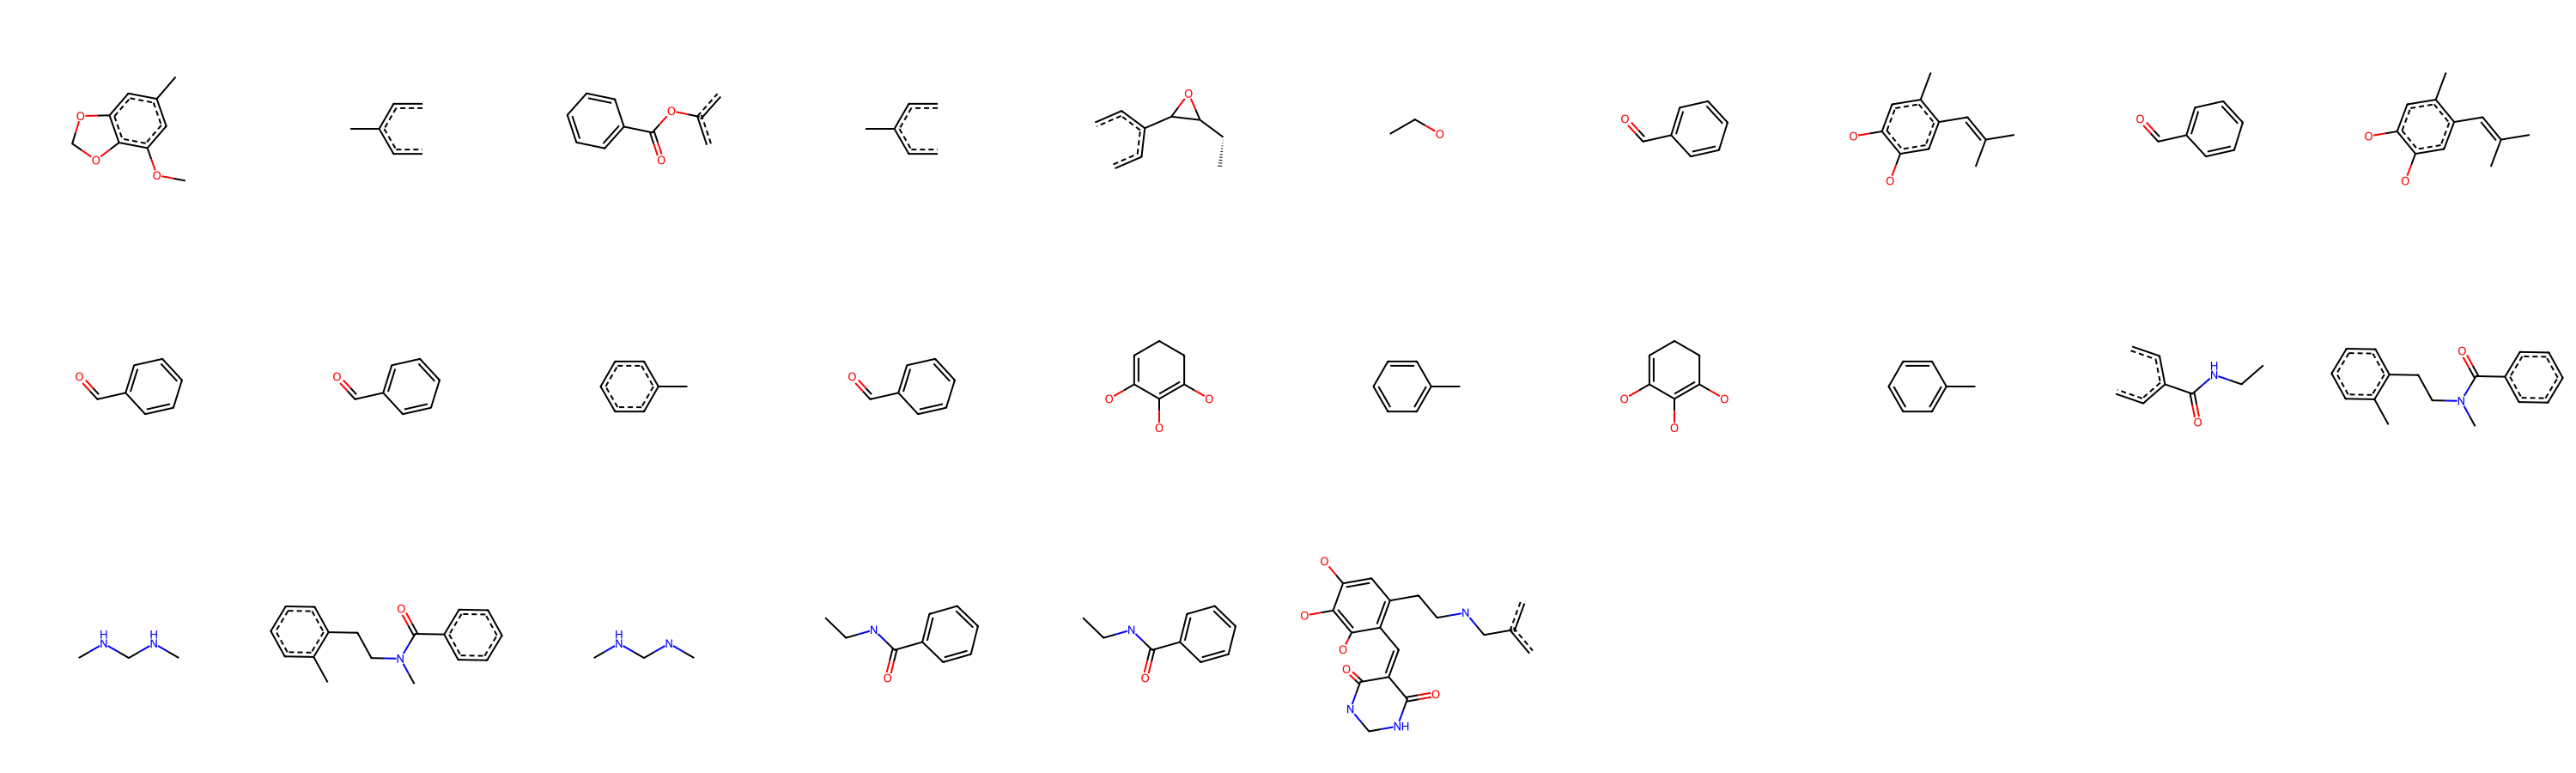

In [16]:
Draw.MolsToGridImage(all_fragment_mols[50:], molsPerRow=10, subImgSize=(300,300))

#### create dataframe of similiar fragments

In [17]:
import pandas as pd

similiar_fragment_df = pd.DataFrame(columns=["smiles", "mol", "count"],
                                    data=[(Chem.MolToSmiles(mol), mol, 1) for mol in all_fragment_mols])

similiar_fragment_df = similiar_fragment_df.groupby("smiles"
                                          ).agg({"mol": "first", "count": "count"}
                                          ).sort_values("count", ascending=False
                                          ).reset_index()

similiar_fragment_df

smiles  \
0                                        O=Cc1ccccc1   
1                                     O=C(O)c1ccccc1   
2                                          Cc1ccccc1   
3                                     NC(=O)c1ccccc1   
4                                           ccc(C)cc   
5                       Cc1ccccc1CCN(C)C(=O)c1ccccc1   
6                             ccc(cc)C(=O)Oc1ccccc1O   
7                             CC(C)=Cc1cc(O)c(O)cc1C   
8                                         OCc1ccccc1   
9                                      Oc1cccc(O)c1O   
10                                        Cc1ccccc1C   
11                                    COc1cccc(O)c1O   
12                                COc1cc(C)cc2c1OCO2   
13                                COc1c(C)ccc2c1OCO2   
14                                             CNCNC   
15                                  CCNC(=O)c1ccccc1   
16                               ccc(c)OC(=O)c(cc)cc   
17                                   ccc(cc)C(=O)NCC   
18                                    ccc(cc)C1OC1CC   
19                         ccc(cc)C(=O)Oc1cccc(c)c1c   
20                           ccc(cc)C(=O)Oc(cc)c(c)c   
21  ccc(cc)C(=O)OCC(O)C(COC(=O)c(cc)cc)OC(=O)c(cc)cc   
22                             ccc(cc)C(=O)Nc1ccccc1   
23                                                 C   
24                                           ccc(c)C   
25                                               ccc   
26                               cc(c)OC(=O)c1ccccc1   
27        cc(c)CNCCc1cc(O)c(O)c(O)c1C=C1C(=O)NCNC1=O   
28                                          c1ccccc1   
29                                               CCO   
30                                             ccccc   

                                                  mol  count  
0   <rdkit.Chem.rdchem.Mol object at 0x00000272C39...     14  
1   <rdkit.Chem.rdchem.Mol object at 0x00000272C39...     10  
2   <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      8  
3   <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      3  
4   <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      3  
5   <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      2  
6   <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      2  
7   <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      2  
8   <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      2  
9   <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      2  
10  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      2  
11  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      2  
12  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      2  
13  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      2  
14  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      2  
15  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      2  
16  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      2  
17  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
18  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
19  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
20  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
21  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
22  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
23  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
24  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
25  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
26  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
27  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
28  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
29  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1  
30  <rdkit.Chem.rdchem.Mol object at 0x00000272C39...      1

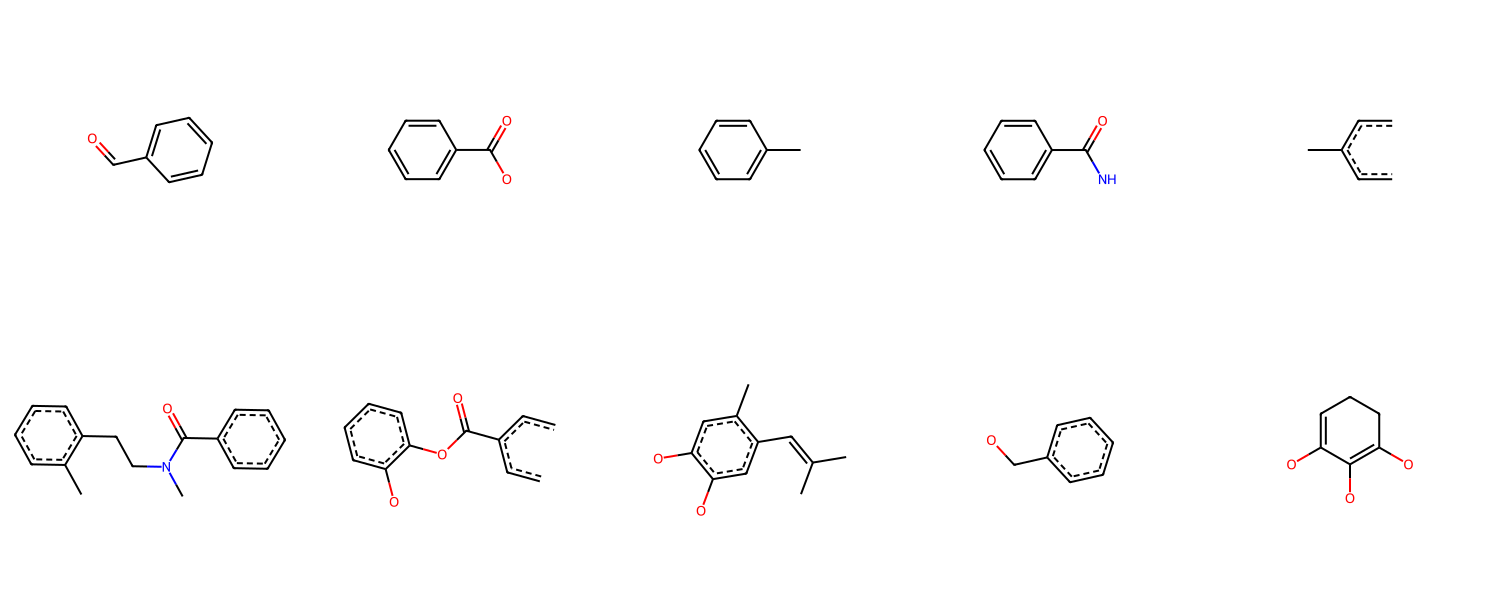

In [18]:
# draw the 10 most common similiar fragments among all molecules
Draw.MolsToGridImage(similiar_fragment_df.mol[:10], molsPerRow=5, subImgSize=(300,300))

In [19]:
similiar_fragment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   smiles  31 non-null     object
 1   mol     31 non-null     object
 2   count   31 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 876.0+ bytes


#### draw morgan features dirctly

Using Fingerprint Generator will avoid the deprecation warning from AllChem.GetMorganFingerprintAsBitVect. But I dont know how to get the bitInfo for Draw.DrawMorganBit???

```python
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

morgan_fp_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)
mol = Chem.MolFromSmiles('O=C1N([C@@H](C)C2CC2)CC3=CC(C4=C(C)N=C(NC(C)=O)S4)=CC(S(=O)(C)=O)=C31')

active_bit_inidices = np.zeros(1,)
DataStructs.ConvertToNumpyArray(morgan_fp_gen.GetFingerprint(mol), active_bit_inidices)
active_bit_inidices = np.nonzero(active_bit_inidices)[0]
active_bit_inidices
```

In [30]:
morgan_radius = 2

In [31]:
from rdkit.Chem import rdMolDescriptors
morganBitInfos = []
for mol in mols:
    bit_info = {}
    rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=morgan_radius, bitInfo=bit_info)
    morganBitInfos.append(bit_info)

morgan_bit_df = pd.DataFrame(columns=["bit", "count", "mol_ids"])

for i, bit_info in enumerate(morganBitInfos):
    for df_bit_id, draw2d in bit_info.items():
        new_row = {"bit": df_bit_id, "count": 1, "mol_ids": i}
        morgan_bit_df = pd.concat([morgan_bit_df, pd.DataFrame([new_row])], ignore_index=True)
        
morgan_bit_df = morgan_bit_df.groupby("bit"
                                    ).agg({"count": "count", "mol_ids": list}
                                    ).sort_values("count", ascending=False
                                    ).reset_index()

morgan_bit_df

[14:30:09] DEPRECATION WARNING: please use MorganGenerator
[14:30:09] DEPRECATION WARNING: please use MorganGenerator
[14:30:09] DEPRECATION WARNING: please use MorganGenerator
[14:30:09] DEPRECATION WARNING: please use MorganGenerator
[14:30:09] DEPRECATION WARNING: please use MorganGenerator
[14:30:09] DEPRECATION WARNING: please use MorganGenerator
[14:30:09] DEPRECATION WARNING: please use MorganGenerator
[14:30:09] DEPRECATION WARNING: please use MorganGenerator
[14:30:09] DEPRECATION WARNING: please use MorganGenerator
[14:30:09] DEPRECATION WARNING: please use MorganGenerator


bit  count                         mol_ids
0     650     10  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1    1873     10  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2    1380     10  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
3    1199     10  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
4    1088     10  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
..    ...    ...                             ...
184   406      1                             [1]
185   472      1                             [6]
186  1039      1                             [5]
187  1036      1                             [3]
188     1      1                             [0]

[189 rows x 3 columns]

In [37]:
shared_features = morgan_bit_df[morgan_bit_df["count"] > 1]

draw_tuples = []
for index in shared_features.index:
    mol_id = shared_features.iloc[index].mol_ids[0]
    draw_tuple = (mols[mol_id], shared_features.iloc[index].bit, morganBitInfos[mol_id])
    draw_tuples.append(draw_tuple)        
    
print(Draw.DrawMorganBits(draw_tuples))

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=450x3600 at 0x272C5498C90>


##### inspect morgan bits

somehow morgan bits look different for different molecules. I dont know what to make of it

In [33]:
from IPython.display import SVG

def DrawAllMorganBits(df_bit_id: int, morgan_bit_df: pd.DataFrame) -> SVG:
    draw_tuples = []
    for mol_id in morgan_bit_df.mol_ids[df_bit_id]:
        draw_tuple = (mols[mol_id], morgan_bit_df.bit[df_bit_id], morganBitInfos[mol_id])
        draw_tuples.append(draw_tuple)
    
    return Draw.DrawMorganBits(draw_tuples, useSVG=True)

In [ ]:
DrawAllMorganBits(0, morgan_bit_df)

<IPython.core.display.SVG object>


In [35]:
from IPython.display import HTML, display
import math

def display_svg_grid(svg_list, ncols=5, svg_size="200px"):
    """Display list of SVG objects in a grid"""
    # Calculate rows needed
    nrows = math.ceil(len(svg_list) / ncols)
    
    # Create HTML table
    html = '<table style="border-spacing: 10px;">'
    
    # Build grid
    for i in range(nrows):
        html += '<tr>'
        for j in range(ncols):
            idx = i * ncols + j
            if idx < len(svg_list):
                # Set fixed size for each SVG
                svg_str = svg_list[idx].data.replace('<svg ', 
                    f'<svg width="{svg_size}" height="{svg_size}" ')
                html += f'<td style="padding:5px;">{svg_str}</td>'
            else:
                html += '<td></td>'
        html += '</tr>'
    html += '</table>'
    
    # Display grid
    display(HTML(html))

In [36]:
imgs = []
for indes in shared_features.index:
    imgs.append(DrawAllMorganBits(indes, morgan_bit_df))

display_svg_grid(imgs, ncols=5, svg_size="300px")

#### Next?